# Importation de donnée

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("titanic-passengers.csv",";")

In [3]:
df=df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [4]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

# Data Processing

In [5]:
from sklearn.impute import SimpleImputer
moyimp=SimpleImputer(missing_values=np.nan,strategy="mean")
X[:,2:3]=moyimp.fit_transform(X[:,2:3])

modimp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
X[:,6:]=modimp.fit_transform(X[:,6:])

In [ ]:
recodant les varibale suvived, sex et Embarked par des des valeurs numérique

In [6]:
from sklearn.preprocessing import LabelEncoder

lebenc=LabelEncoder()

X[:,1]=lebenc.fit_transform(X[:,1])
X[:,6]=lebenc.fit_transform(X[:,6])
y[:]=lebenc.fit_transform(y[:])
y=y.astype('int')

# Split Data

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

# Decision tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

dectre=DecisionTreeClassifier(criterion = 'gini', random_state = 50)
dectre.fit(X_train, y_train)
y_pred = dectre.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
scr_1=dectre.score(X_test, y_test)*100
acc_1=accuracy_score(y_test,y_pred)*100
f1_1=f1_score(y_test,y_pred)*100
rec_1=recall_score(y_test,y_pred)*100
pre_1=precision_score(y_test,y_pred)*100
print("Les metrics: \n"
     "\t score=",scr_1,"%\n",
     "\t accuracy_score=",acc_1,"%\n",
     "\t f1_score=",f1_1,"%\n",
     "\t precision_score=",pre_1,"%\n",
     "\t recall_score=",rec_1,"%\n",)

Les metrics: 
	 score= 78.73134328358209 %
 	 accuracy_score= 78.73134328358209 %
 	 f1_score= 72.1951219512195 %
 	 precision_score= 77.89473684210526 %
 	 recall_score= 67.27272727272727 %



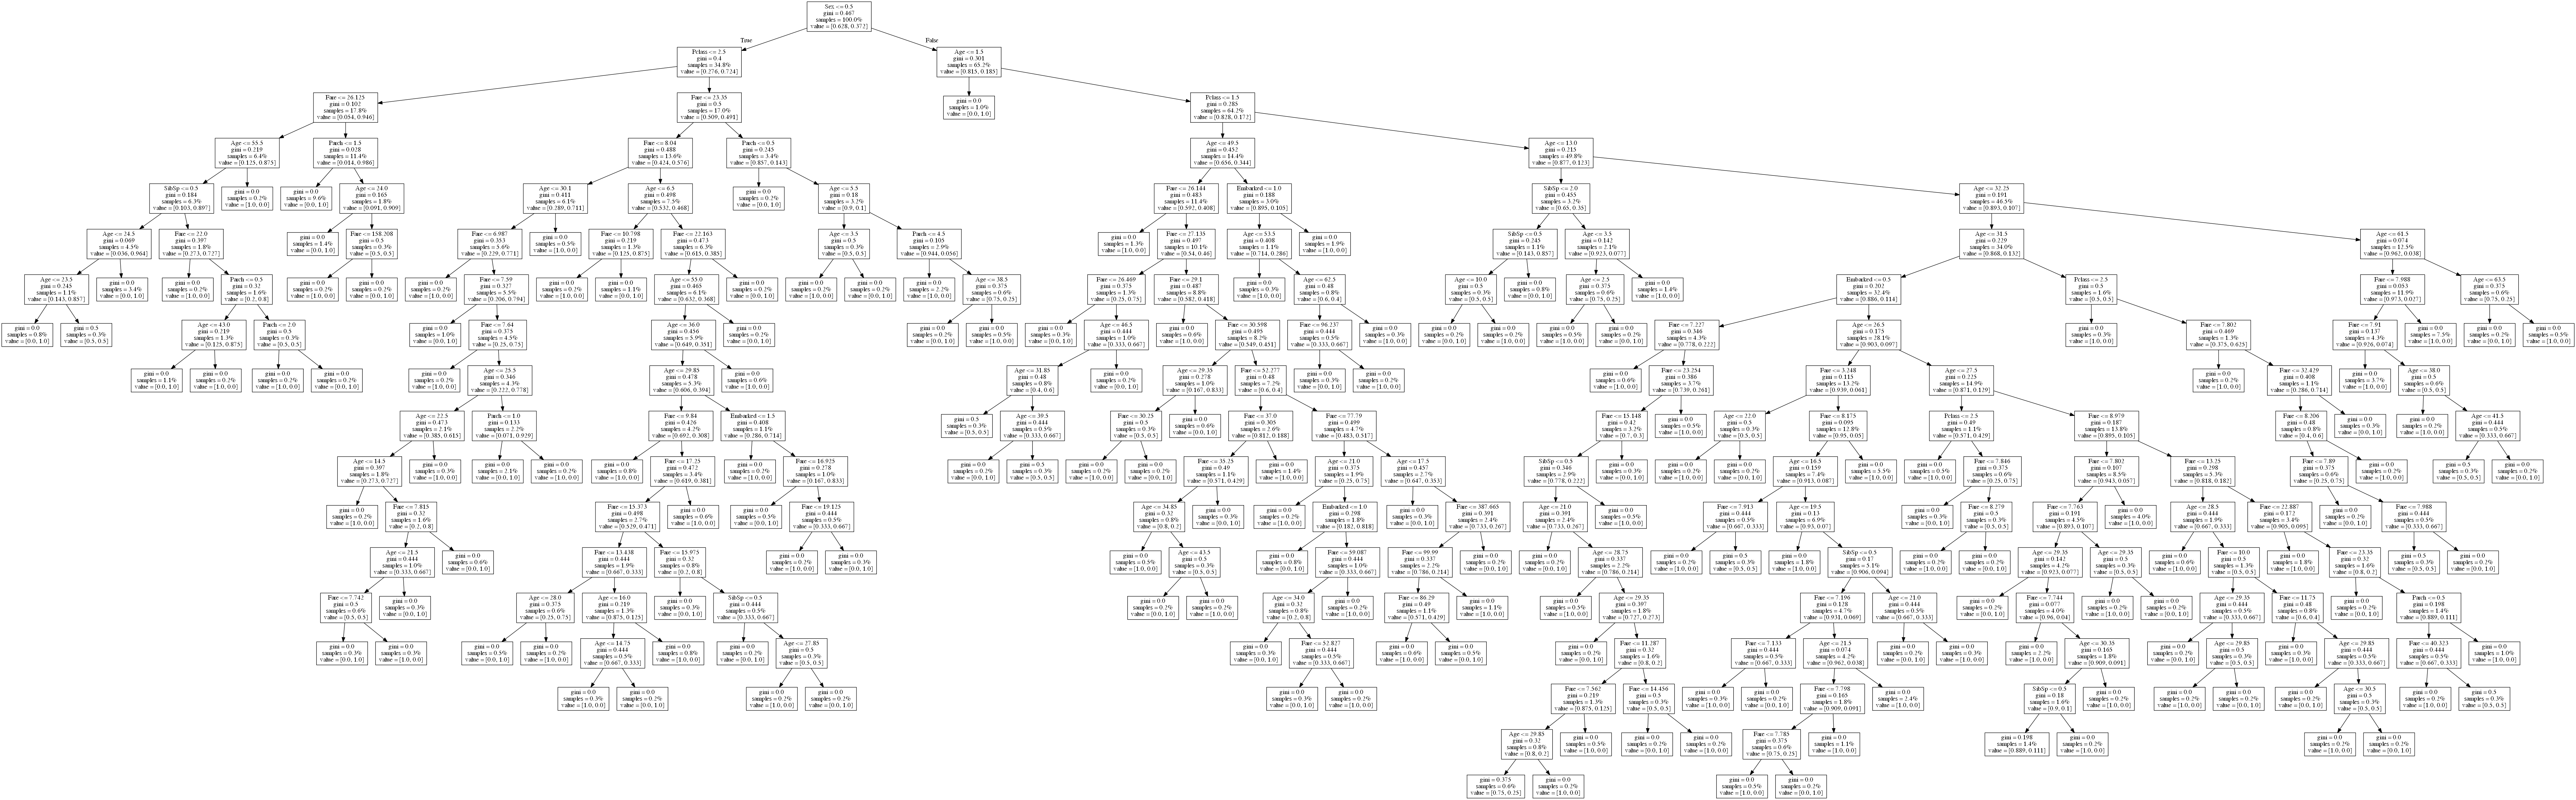

In [10]:
from six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

X_names = df.drop('Survived', axis = 1)

data = tree.export_graphviz(dectre, out_file=None, feature_names= X_names.columns.values, proportion= True)

graph = pydotplus.graph_from_dot_data(data) 
Image(graph.create_png())

In [24]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_leaf': [0.02,0.04, 0.06, 0.08]
}
grid_object = GridSearchCV(estimator = dectre, param_grid = grid_params, scoring = 'accuracy', cv = 10)
grid_object.fit(X_train, y_train)
grid_object.best_params_

{'max_depth': 3, 'min_samples_leaf': 0.08}

In [28]:
decTree_2 = DecisionTreeClassifier(criterion = 'gini', random_state = 20, max_depth= 3, min_samples_leaf=0.08)
decTree_2.fit(X_train, y_train)
y_pred_2 = dectre.predict(X_test)

scr_2=dectre.score(X_test, y_test)*100
acc_2=accuracy_score(y_test,y_pred_2)*100
f1_2=f1_score(y_test,y_pred_2)*100
rec_2=recall_score(y_test,y_pred_2)*100
pre_2=precision_score(y_test,y_pred_2)*100

print("Les metrics: \n"
     "\t score=",scr_2,"%\n",
     "\t accuracy_score=",acc_2,"%\n",
     "\t f1_score=",f1_2,"%\n",
     "\t precision_score=",pre_2,"%\n",
     "\t recall_score=",rec_2,"%\n",)


Les metrics: 
	 score= 78.73134328358209 %
 	 accuracy_score= 78.73134328358209 %
 	 f1_score= 72.1951219512195 %
 	 precision_score= 77.89473684210526 %
 	 recall_score= 67.27272727272727 %



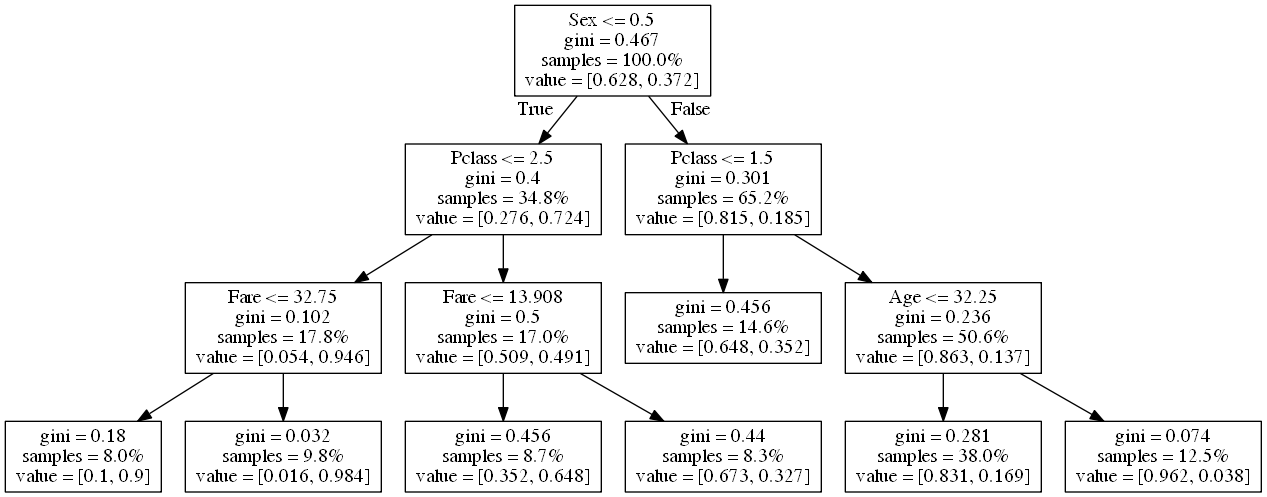

In [26]:
data = tree.export_graphviz(decTree_2, out_file=None, feature_names= X_names.columns.values, proportion= True)

graph = pydotplus.graph_from_dot_data(data) 
Image(graph.create_png())

# forêt aléatoire

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
initialisant le model

In [30]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_3 = model.predict(X_test)

In [34]:
scr_3=dectre.score(X_test, y_test)*100
acc_3=accuracy_score(y_test,y_pred_3)*100
f1_3=f1_score(y_test,y_pred_3)*100
rec_3=recall_score(y_test,y_pred_3)*100
pre_3=precision_score(y_test,y_pred_3)*100

print("Les metrics: \n"
     "\t score=",scr_3,"%\n",
     "\t accuracy_score=",acc_3,"%\n",
     "\t f1_score=",f1_3,"%\n",
     "\t precision_score=",pre_3,"%\n",
     "\t recall_score=",rec_3,"%\n",)

Les metrics: 
	 score= 78.73134328358209 %
 	 accuracy_score= 82.08955223880598 %
 	 f1_score= 77.14285714285715 %
 	 precision_score= 81.0 %
 	 recall_score= 73.63636363636363 %

